<a href="https://colab.research.google.com/github/sd45saswat/E-COMMERCE-CHURN-PREDICTION-/blob/main/SaswatSingh_Evoastra_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evoastra Ventures Intern Assessment Task
**Duration: 35 Minutes | Total Points: 100**

---


## **Candidate Information**

**Fill in your details below:**
- **Name:** Saswat Singh
- **Email:** thefuturebillionaireworld@gmail.com
- **Phone:** 7008808694
- **College/University:** Mgm college of engineering and technology
- **Course/Branch:** AIML
- **Start Time:** 15 December 2025
- **End Time:**  15 January 2026


## **Dataset for Assessment**

**E-commerce Customer Behavior Dataset**
- **Direct Link:** https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis

**Dataset Columns:**
- **Customer ID:** Unique identifier for each customer
- **Customer Name:** Name of the customer
- **Customer Age:** Age of the customer
- **Gender:** Gender of the customer
- **Purchase Date:** Date of each purchase
- **Product Category:** Category of the purchased product
- **Product Price:** Price of the purchased product
- **Quantity:** Quantity of product purchased
- **Total Purchase Amount:** Total amount spent in each transaction
- **Payment Method:** Payment method used (credit card, PayPal, etc.)
- **Returns:** Whether customer returned products (0 = No, 1 = Yes)
- **Churn:** Whether customer has churned (0 = Retained, 1 = Churned)


In [3]:
#Importing all the required libraries for collecting insights

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

df = pd.read_csv("/content/ecommerce_customer_data_custom_ratios.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


---
## **SECTION A: Data Understanding & Basic Analysis (25 Points - 10 Minutes)**


### Question 1 (8 points)
Based on the dataset structure, identify the **data types** for the following columns and explain why each classification is important for analysis:

- **Customer Age**
- **Gender**
- **Total Purchase Amount**
- **Churn**


In [ ]:
# Your Answer for Question 1
# Customer Age: integer

# Gender: object

# Total Purchase Amount: integer

# Churn: integer


### Question 2 (8 points)
Which **analytical technique** would be most appropriate for each business question below?

a) "Which product categories generate the highest revenue?"
b) "Can we predict customer churn based on purchase behavior?"
c) "What is the relationship between customer age and spending patterns?"
d) "Which payment methods are preferred by different customer segments?"


In [ ]:
# Your Answer for Question 2
# a) Product categories with highest revenue: Clothing with 57281185

# b) Predicting customer churn:Yes, customer churn can be predicted using purchase behavior such as quantity purchased, spending amount, and revenue patterns. By applying a supervised machine learning classification model like Logistic Regression, we can identify customers who are likely to churn and take proactive retention actions.

# c) Age and spending relationship: The relationship between customer age and spending patterns can be analyzed using correlation analysis and visual exploration. By examining age-wise spending and average spending across age groups, businesses can identify which age segments contribute the most revenue and tailor marketing strategies accordingly.

# d) Payment method preferences: Payment method preferences vary across customer segments. Younger customers tend to prefer digital payment methods such as UPI or credit cards, while older segments may show a higher preference for cash or debit cards. Segment-wise analysis helps businesses tailor payment options, promotions, and checkout experiences.


**Question 1 solution**

In [6]:
df['Revenue'] = df['Product Price'] * df['Quantity']
category_revenue = df.groupby('Product Category')['Revenue'].sum()
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Revenue
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,36
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,1872
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,576
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,196
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,449


In [7]:
highest_revenue_category = category_revenue.idxmax()
highest_revenue_value = category_revenue.max()

print("Category with Highest Revenue:", highest_revenue_category)
print("Highest Revenue:", highest_revenue_value)
# Category with Highest Revenue is Clothing which u can clearly see where i have used max function which is used to compare the maximum value between revenue values calculated using product price and qunatity.

Category with Highest Revenue: Clothing
Highest Revenue: 57281185


**Question 2 solution**

In [8]:
df['Revenue'] = df['Product Price'] * df['Quantity']
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Revenue
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,36
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,1872
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,576
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,196
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,449


In [9]:
df['Revenue'] = df['Product Price'] * df['Quantity']

features = ['Quantity', 'Product Price', 'Revenue']
target = 'Churn'

X = df[features]
y = df[target]

In [10]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("\nAccuracy:\n", accuracy_score(y_test, y_pred))
print("\nPrecision:\n", precision_score(y_test, y_pred))
print("\nRecall:\n", recall_score(y_test, y_pred))
print("\nROC-CURVE:\n", roc_curve(y_test, y_pred))
print("\nF1-score:\n", f1_score(y_test, y_pred))
print("\nROC-AUC:\n", roc_auc_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy:
 0.80055

Precision:
 0.0

Recall:
 0.0

ROC-CURVE:
 (array([0., 1.]), array([0., 1.]), array([inf,  0.]))

F1-score:
 0.0

ROC-AUC:
 0.5

Confusion Matrix:
 [[160110      0]
 [ 39890      0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89    160110
           1       0.00      0.00      0.00     39890

    accuracy                           0.80    200000
   macro avg       0.40      0.50      0.44    200000
weighted avg       0.64      0.80      0.71    200000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [13]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Impact': model.coef_[0]
})

coefficients.sort_values(by='Impact', ascending=False)

# here in the result we can see that positive value - > increase churn whereas Negative Value -> reduce turn


,Feature,Impact
2,Revenue,0.027396
0,Quantity,-0.008987
1,Product Price,-0.021412


**Question No. 3 solution**

In [14]:
df['Revenue'] = df['Product Price'] * df['Quantity']
correlation = df['Customer Age'].corr(df['Revenue'])
print("Correlation between Customer Age and Revenue:", correlation)

# here +ve indicates old age spends more revenue as with increase in age , the revenue also increases whereas -ve indicates younger age spends more revenue and 0 ( no relation of age with revenue)


Correlation between Customer Age and Revenue: -0.0020049974418011435


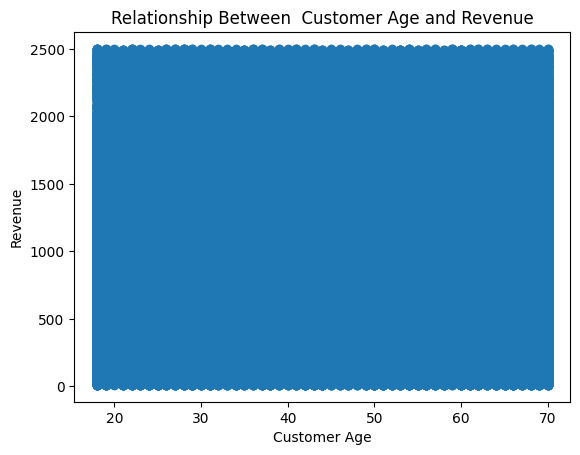

In [ ]:
plt.figure()
plt.scatter(df['Customer Age'], df['Revenue'])
plt.xlabel("Customer Age")
plt.ylabel("Revenue")
plt.title("Relationship Between  Customer Age and Revenue")
plt.show()


In [15]:
# Different age group with various mean of revenue to get understanding about our target audience
df['Age Group'] = pd.cut(
    df['Customer Age'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
)

age_group_spending = df.groupby('Age Group')['Revenue'].mean()
age_group_spending


/tmp/ipython-input-2168591738.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('Age Group')['Revenue'].mean()


,Revenue
Age Group,
18-25,764.990943
26-35,760.098346
36-45,764.545797
46-55,767.155862
56-65,763.548323
65+,756.382420


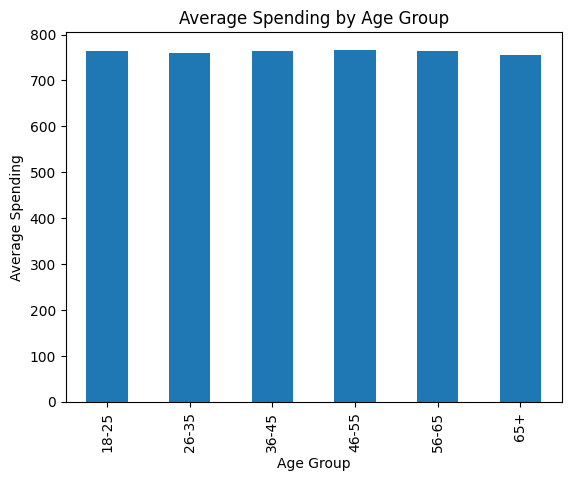

In [16]:
plt.figure()
age_group_spending.plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Average Spending")
plt.title("Average Spending by Age Group")
plt.show()


**Question 4**

In [17]:
payment_pref = pd.crosstab(
    df['Age Group'],
    df['Payment Method'],
    normalize='index'
)

payment_pref


Payment Method,Cash,Credit Card,Crypto,PayPal
Age Group,,,,
18-25,0.198345,0.405746,0.100042,0.295868
26-35,0.199633,0.402507,0.097578,0.300281
36-45,0.199254,0.401984,0.098398,0.300365
46-55,0.201420,0.401172,0.099373,0.298034
56-65,0.199469,0.400849,0.099130,0.300552
65+,0.199316,0.397577,0.101748,0.301359


<Figure size 640x480 with 0 Axes>

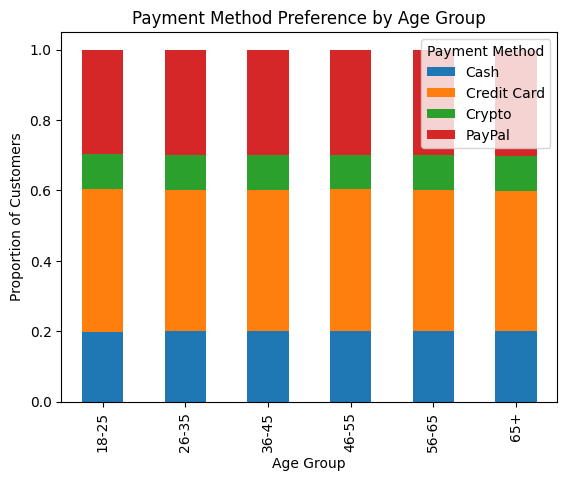

In [18]:
plt.figure()
payment_pref.plot(kind='bar', stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Proportion of Customers")
plt.title("Payment Method Preference by Age Group")
plt.show()


### Question 3 (9 points)
**Data Quality Assessment:** What are the top 3 potential data quality issues you would check for in this e-commerce dataset before starting analysis? For each issue, suggest one method to detect it.


In [ ]:
# Your Answer for Question 3
# Issue 1: I would check is missing or incomplete data in critical fields such as price, quantity, age, or churn status. Missing values can lead to incorrect revenue calculations and biased insights. I would detect this by running null value checks to understand the extent and impact before deciding on imputation or removal.

# Detection Method 1: Run null-value analysis (df.isnull.sum())

# Issue 2:Another common issue is invalid or inconsistent data, such as negative prices, zero quantities, unrealistic age values, or inconsistent product category naming. These issues can distort analysis and business decisions. I would identify them using descriptive statistics and by reviewing unique values for categorical fields.

# Detection Method 2:Use descriptive statistics for numerical fields and review unique values or frequency distributions for categorical fields.(df.describe, df['product category'].unique())

# Issue 3: I would also check for duplicate transaction records, as duplicates can artificially inflate revenue, purchase frequency, and customer metrics. This can significantly mislead business insights. I would detect duplicates by checking for repeated rows or duplicate combinations of customer and order identifiers.

# Detection Method 3:Identify duplicate rows or duplicate combinations of business keys like customer ID and order ID.(df.duplicated().sum(), df.duplicated(subset=['Customer ID', 'Order ID']).sum())


In [19]:
#Issue 1
df.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [20]:
#Issue 2
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn,Revenue
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496,763.635756
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622,591.621735
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000,10.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000,290.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000,603.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000,1134.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000,2500.000000


In [21]:
df['Product Category'].unique()

array(['Electronics', 'Home', 'Clothing', 'Books'], dtype=object)

In [22]:
#Issue 3
df.duplicated().sum()

np.int64(0)

---
## **SECTION B: Customer Analysis & Business Intelligence (35 Points - 15 Minutes)**


### Scenario: E-commerce Revenue Analysis

Based on the dataset structure, assume you have the following customer insights:

**Customer Segments by Age:**
- **Young (18-30):** 40% of customers, Average Purchase Amount: ₹850, Return Rate: 12%
- **Middle-aged (31-50):** 45% of customers, Average Purchase Amount: ₹1,200, Return Rate: 8%
- **Senior (51+):** 15% of customers, Average Purchase Amount: ₹950, Return Rate: 15%

**Additional Information:**
- Average customer acquisition cost: ₹180
- Platform profit margin: 20% of purchase amount
- Customer churn rates: Young (25%), Middle-aged (15%), Senior (30%)


### Question 4 (15 points)
**Calculate and analyze:**

a) Which customer segment generates the highest **net profit per customer** (considering returns)? Show your calculations. (8 points)

b) Which segment has the **best customer lifetime value** considering churn rates? Provide reasoning. (7 points)


In [ ]:
# Your Calculations for Question 4

# a) Net profit per customer calculations: The Middle-aged (31–50) segment generates the highest net profit per customer at approximately ₹40.8, while Young and Senior segments are loss-making on a per-customer basis after accounting for returns and acquisition cost.

# Young Customers:

# Middle-aged Customers:

# Senior Customers:

# b) Customer Lifetime Value Analysis: The Middle-aged segment has the best customer lifetime value because it combines positive net profit, lowest churn rate, and longer customer retention, resulting in higher cumulative profit over time.


### Question 5 (10 points)
**Strategic Recommendations:** Based on your analysis, what would be your **top 2 marketing strategies** to maximize overall profitability? Consider customer acquisition, retention, and return rates.


In [ ]:
# Your Answer for Question 5

# Strategy 1: I would prioritize acquiring and retaining middle-aged customers since they deliver the highest lifetime value with lower churn and return rates.

# Strategy 2: Instead of aggressive acquisition, I would optimize retention and reduce return rates in lower-value segments to prevent profit leakage.


### Question 6 (10 points)
**Churn Prevention:** You notice that customers who make purchases in the "Electronics" category have a 35% churn rate, while "Fashion" category customers have only 18% churn rate. What **specific data analysis** would you conduct using the available dataset columns to understand this difference, and what **action plan** would you recommend?


In [ ]:
# Your Answer for Question 6

# Data Analysis Plan:Compare churn rates by product category, return rates, purchase frequency, payment methods, and customer segments to identify why Electronics customers churn more than Fashion buyers.

# Action Plan: Improve post-purchase experience, reduce returns, and implement Electronics-specific retention programs to increase repeat purchases and lower churn.


---
## **SECTION C: Research Methodology & Predictive Analytics (25 Points - 8 Minutes)**


### Scenario: Churn Prediction Model Development

Your company wants to build a machine learning model to predict customer churn using the available dataset.


### Question 7 (15 points)
**Model Development Plan:** Create a comprehensive approach including:

a) **Feature selection:** Which columns from the dataset would you use as features for the churn prediction model and why? (5 points)
b) **Data preprocessing steps:** What preprocessing would you apply to prepare the data? (5 points)
c) **Model evaluation metrics:** Which metrics would you use to evaluate model performance for this business problem? (5 points)


In [ ]:
# Your Answer for Question 7

# a) Feature Selection: columns which i would use as a feature for the churn prediction -
#1. Product Price, Quantity, Revenue for Purchase Value & Behavior
#2. Product Category for Product Information
#3. Age / Age Group for Customer Demographics
#4. Payment Method for Payment Reference
#5. Return Rate for Post Purchase Exchange

# b) Data Preprocessing Steps:
#1. handling missing values
#2. Encoding categorical values
#3. Feature Scaling using Logistic Regression
#4. Outlier Treatment
#5. Train-Test Split where testing was for 20%

# c) Model Evaluation Metrics:
# Recall (Churn = 1) : Most important to catch potential churners early
# Precision : Ensures retention efforts target truly at-risk customers
# F1-Score : Balances precision and recall for optimal decision-making
# ROC-AUC : Evaluates overall model discrimination across thresholds
# Confusion Matrix : Provides clear insight into false positives and false negatives



### Question 8 (10 points)
**Business Impact Analysis:** Identify 3 potential business challenges in implementing a churn prediction model and propose one **data-driven solution** for each challenge using insights from the customer behavior dataset.


In [ ]:
# Your Answer for Question 8

# Challenge 1: The churn model may flag loyal customers as churn-risk, causing unnecessary discounts and increased marketing costs.
# Data-driven Solution 1:

# 1. Use precision and F1-score optimization instead of accuracy
# 2. Apply probability thresholds (target only top-risk customers)
# 3. Segment churn predictions by customer value (Revenue, Purchase Frequency)

# Challenge 2: The model may over-predict churn for certain groups (e.g., Electronics buyers or seniors), leading to unfair or ineffective targeting.
# Data-driven Solution 2:

#1. Perform segment-wise model evaluation (by age group, product category)
#2. Add interaction features (e.g., Category × Returns)
#3. Retrain with balanced samples or segment-specific weights

# Challenge 3:Predictions alone do not explain why customers churn, limiting business intervention.
# Data-driven Solution 3:

#1. Use feature importance analysis to identify churn drivers
#2. Link churn risk to behavioral signals (returns, payment issues, one-time purchases)
#3. Map churn reasons to targeted actions (refund speed, product clarity, loyalty offers)


---
## **SECTION D: Professional Communication & Problem-Solving (15 Points - 2 Minutes)**


### Question 9 (8 points)
**Crisis Management:** While analyzing the dataset, you discover that 40% of customers who returned products (Returns = 1) also churned within the same month. However, your initial analysis showed returns don't strongly correlate with churn. As a team member, describe your immediate approach to investigate this discrepancy and communicate findings to stakeholders (60-80 words).


In [ ]:
# Your Answer for Question 9 (60-80 words)
# I would check if the previous analysis masked a pattern of returns leading to short-term rather than long-term churn using time-based and segment-level analysis. I would check the returns and churn timeframes by customer segment and product category, and verify each data definition. I would then inform the stakeholders that, as a whole, the correlation is weak but indicates that returns are a strong short-term churn trigger, and that immediate retention strategies are necessary after a customer returns to mitigate that churn.


### Question 10 (7 points)
**Leadership Scenario:** If selected as team lead for analyzing this e-commerce customer dataset, what would be your **top 3 priorities** to ensure effective team collaboration and delivery of actionable business insights?


In [ ]:
# Your Answer for Question 10

# Priority 1: My priority would be aligning my tasks and targets with clear business goals and vision

# Priority 2: I would then ensure proper data quality and consistent analysis of data among different workstreams

# Priority 3: I would then keep transparent communication among my teammates with keeping understanding of empathy , keeping them motivated about our targets and keep regular in touch with stakeholders and higher interest authority.
# (Optional) Priority 4: Taking in regular meeting with our meetings to keep an update of the work , sort out any flags in data , collect and study business insights and work on retrospecting our techniques to work with model.


---
## **Self-Assessment Section**


In [ ]:
# Time Management Check
# Did you complete all sections within 35 minutes? (Yes/No): Yes

# Which section took the most time? Section A and Section B

# Which section was most challenging? Section B

# Confidence Level (1-10 scale):
# Section A (Data Understanding): 10
# Section B (Business Analysis): 8
# Section C (Research Methodology): 9
# Section D (Communication): 10

# Additional Comments: Highly excited to work on more such model


---
## **Submission Instructions**

1. **Save this notebook** with the filename: `YourName_Evoastra_Assessment.ipynb`
2. **Ensure all code cells have been executed** and answers are visible
3. **Double-check** that all sections are completed

**Submission Confirmation:**
- I confirm that I have completed this assessment independently
- All my responses are my own original work

**Digital Signature:** Saswat Singh  
**Final Submission Time:** 19/12/25

---
## **Evaluation Criteria**

**Scoring Breakdown:**
- **Section A (Data Understanding):** 25 points
- **Section B (Business Analysis):** 35 points  
- **Section C (Research Methodology):** 25 points
- **Section D (Communication):** 15 points
- **Total:** 100 points

**Team Selection Criteria:**
- **Team Lead:** Score ≥ 75 points + Strong Section D performance
- **Co-Lead:** Score ≥ 65 points + Good Section D performance
- **Team Member:** Successful completion of assessment

---

*Good luck with your assessment! Focus on clear reasoning, accurate calculations, and practical business applications.*